In [3]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

In [9]:
ds = pd.read_csv(r"C:\Users\dell\Desktop\MyDocs\Docs\MK\PMC7727026_abbreviated.csv")
# X = ds.iloc[:,["Percent male (%)","Age (years)","Height (cm)","Weight (kg)","BMI (kg/m2)","Frequency of exercise before intervention Other","Protein intake before intervention (g/kg/day)"],"Protein intake before intervention (g/day)","Protein intake during intervention (not include supplementation) (g/kg/day)","Protein intake during intervention (not include supplementation) (g/day)","Protein intake during intervention (include supplementation) (g/kg/day)","Protein intake during intervention (include supplementation) (g/day)","Energy intake before intervention (g/kg/day)",""].values
# y = ds.iloc[:,["LBM change (kg)"]].values
ds.head()

,Author and Year,Group,Study Weight Percentage,Percent male (%),Race with largest number,Age (years),Height (cm),Weight (kg),BMI (kg/m2),Health state,Duration (weeks),Type ofExercise,(times/week),Energy balance,Protein intake (g/kg/day),Energy intake (kcal/kg/day),LBM change (kg),LBM change per week (kg/wk),Relative LBM change,Relative LBM change per week
0,Campbell (1995) [1],Experimental,0.3,83,Caucasian,65.0,173.3,78.0,26.0,Healthy,12,Resistance exercise,3,No intervention,2.40,37.0,1.8,0.150000,0.023077,0.001923
1,Rozenek (2002) [2],Experimental,0.5,100,Caucasian,23.2,178.3,76.4,24.1,Healthy,8,Resistance exercise,4,Intake > Expenditure,3.30,63.3,2.9,0.362500,0.037958,0.004745
2,Flakoll (2004) [3],Experimental,0.9,100,Caucasian,18.9,177.0,74.9,23.4,Healthy,8,Resistance exercise & other exercise,4,No intervention,NaN,NaN,-2.7,-0.337500,-0.036048,-0.004506
3,Rankin (2004) [4],Experimental,0.6,100,Caucasian,20.8,177.5,78.9,25.1,Healthy,10,Resistance exercise,3,No intervention,1.25,33.3,1.6,0.160000,0.020279,0.002028
4,Layman (2005) (with RT) [5],Experimental,1.0,0,Caucasian,46.7,163.2,87.7,33.0,Healthy,17,Resistance exercise & other exercise,2,Intake < Expenditure,NaN,NaN,-0.4,-0.023529,-0.004561,-0.000268


In [11]:
# Count missing values in each column
missing_values = ds.isnull().sum()

# Filter columns with missing values
columns_with_missing = missing_values[missing_values > 0]

# Display the columns and their respective missing values count
columns_with_missing

Height (cm)                      2
Weight (kg)                      2
Protein intake (g/kg/day)       17
Energy intake (kcal/kg/day)     19
Relative LBM change              2
Relative LBM change per week     2
dtype: int64

In [13]:
# Fill missing values with the mode for each column
ds_filled = ds.fillna(ds.mode().iloc[0])

# Verify if missing values are filled
missing_values_after = ds_filled.isnull().sum()

missing_values_after

Author and Year                 0
Group                           0
Study Weight Percentage         0
Percent male (%)                0
Race with largest number        0
Age (years)                     0
Height (cm)                     0
Weight (kg)                     0
BMI (kg/m2)                     0
Health state                    0
Duration (weeks)                0
Type ofExercise                 0
(times/week)                    0
Energy balance                  0
Protein intake (g/kg/day)       0
Energy intake (kcal/kg/day)     0
LBM change (kg)                 0
LBM change per week (kg/wk)     0
Relative LBM change             0
Relative LBM change per week    0
dtype: int64

In [15]:
# Identify categorical columns (you can also manually specify if you know them)
categorical_columns = ds_filled.select_dtypes(include=['object']).columns

# Apply label encoding to categorical columns
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

for col in categorical_columns:
    ds_filled[col] = label_encoder.fit_transform(ds_filled[col].astype(str))

# Verify the encoding
ds = ds_filled
ds_filled.head()

,Author and Year,Group,Study Weight Percentage,Percent male (%),Race with largest number,Age (years),Height (cm),Weight (kg),BMI (kg/m2),Health state,Duration (weeks),Type ofExercise,(times/week),Energy balance,Protein intake (g/kg/day),Energy intake (kcal/kg/day),LBM change (kg),LBM change per week (kg/wk),Relative LBM change,Relative LBM change per week
0,0,1,0.3,83,0,65.0,173.3,78.0,26.0,1,12,0,3,3,2.40,37.0,1.8,0.150000,0.023077,0.001923
1,48,1,0.5,100,0,23.2,178.3,76.4,24.1,1,8,0,4,2,3.30,63.3,2.9,0.362500,0.037958,0.004745
2,15,1,0.9,100,0,18.9,177.0,74.9,23.4,1,8,1,4,3,1.38,21.4,-2.7,-0.337500,-0.036048,-0.004506
3,44,1,0.6,100,0,20.8,177.5,78.9,25.1,1,10,0,3,3,1.25,33.3,1.6,0.160000,0.020279,0.002028
4,30,1,1.0,0,0,46.7,163.2,87.7,33.0,1,17,1,2,0,1.38,21.4,-0.4,-0.023529,-0.004561,-0.000268


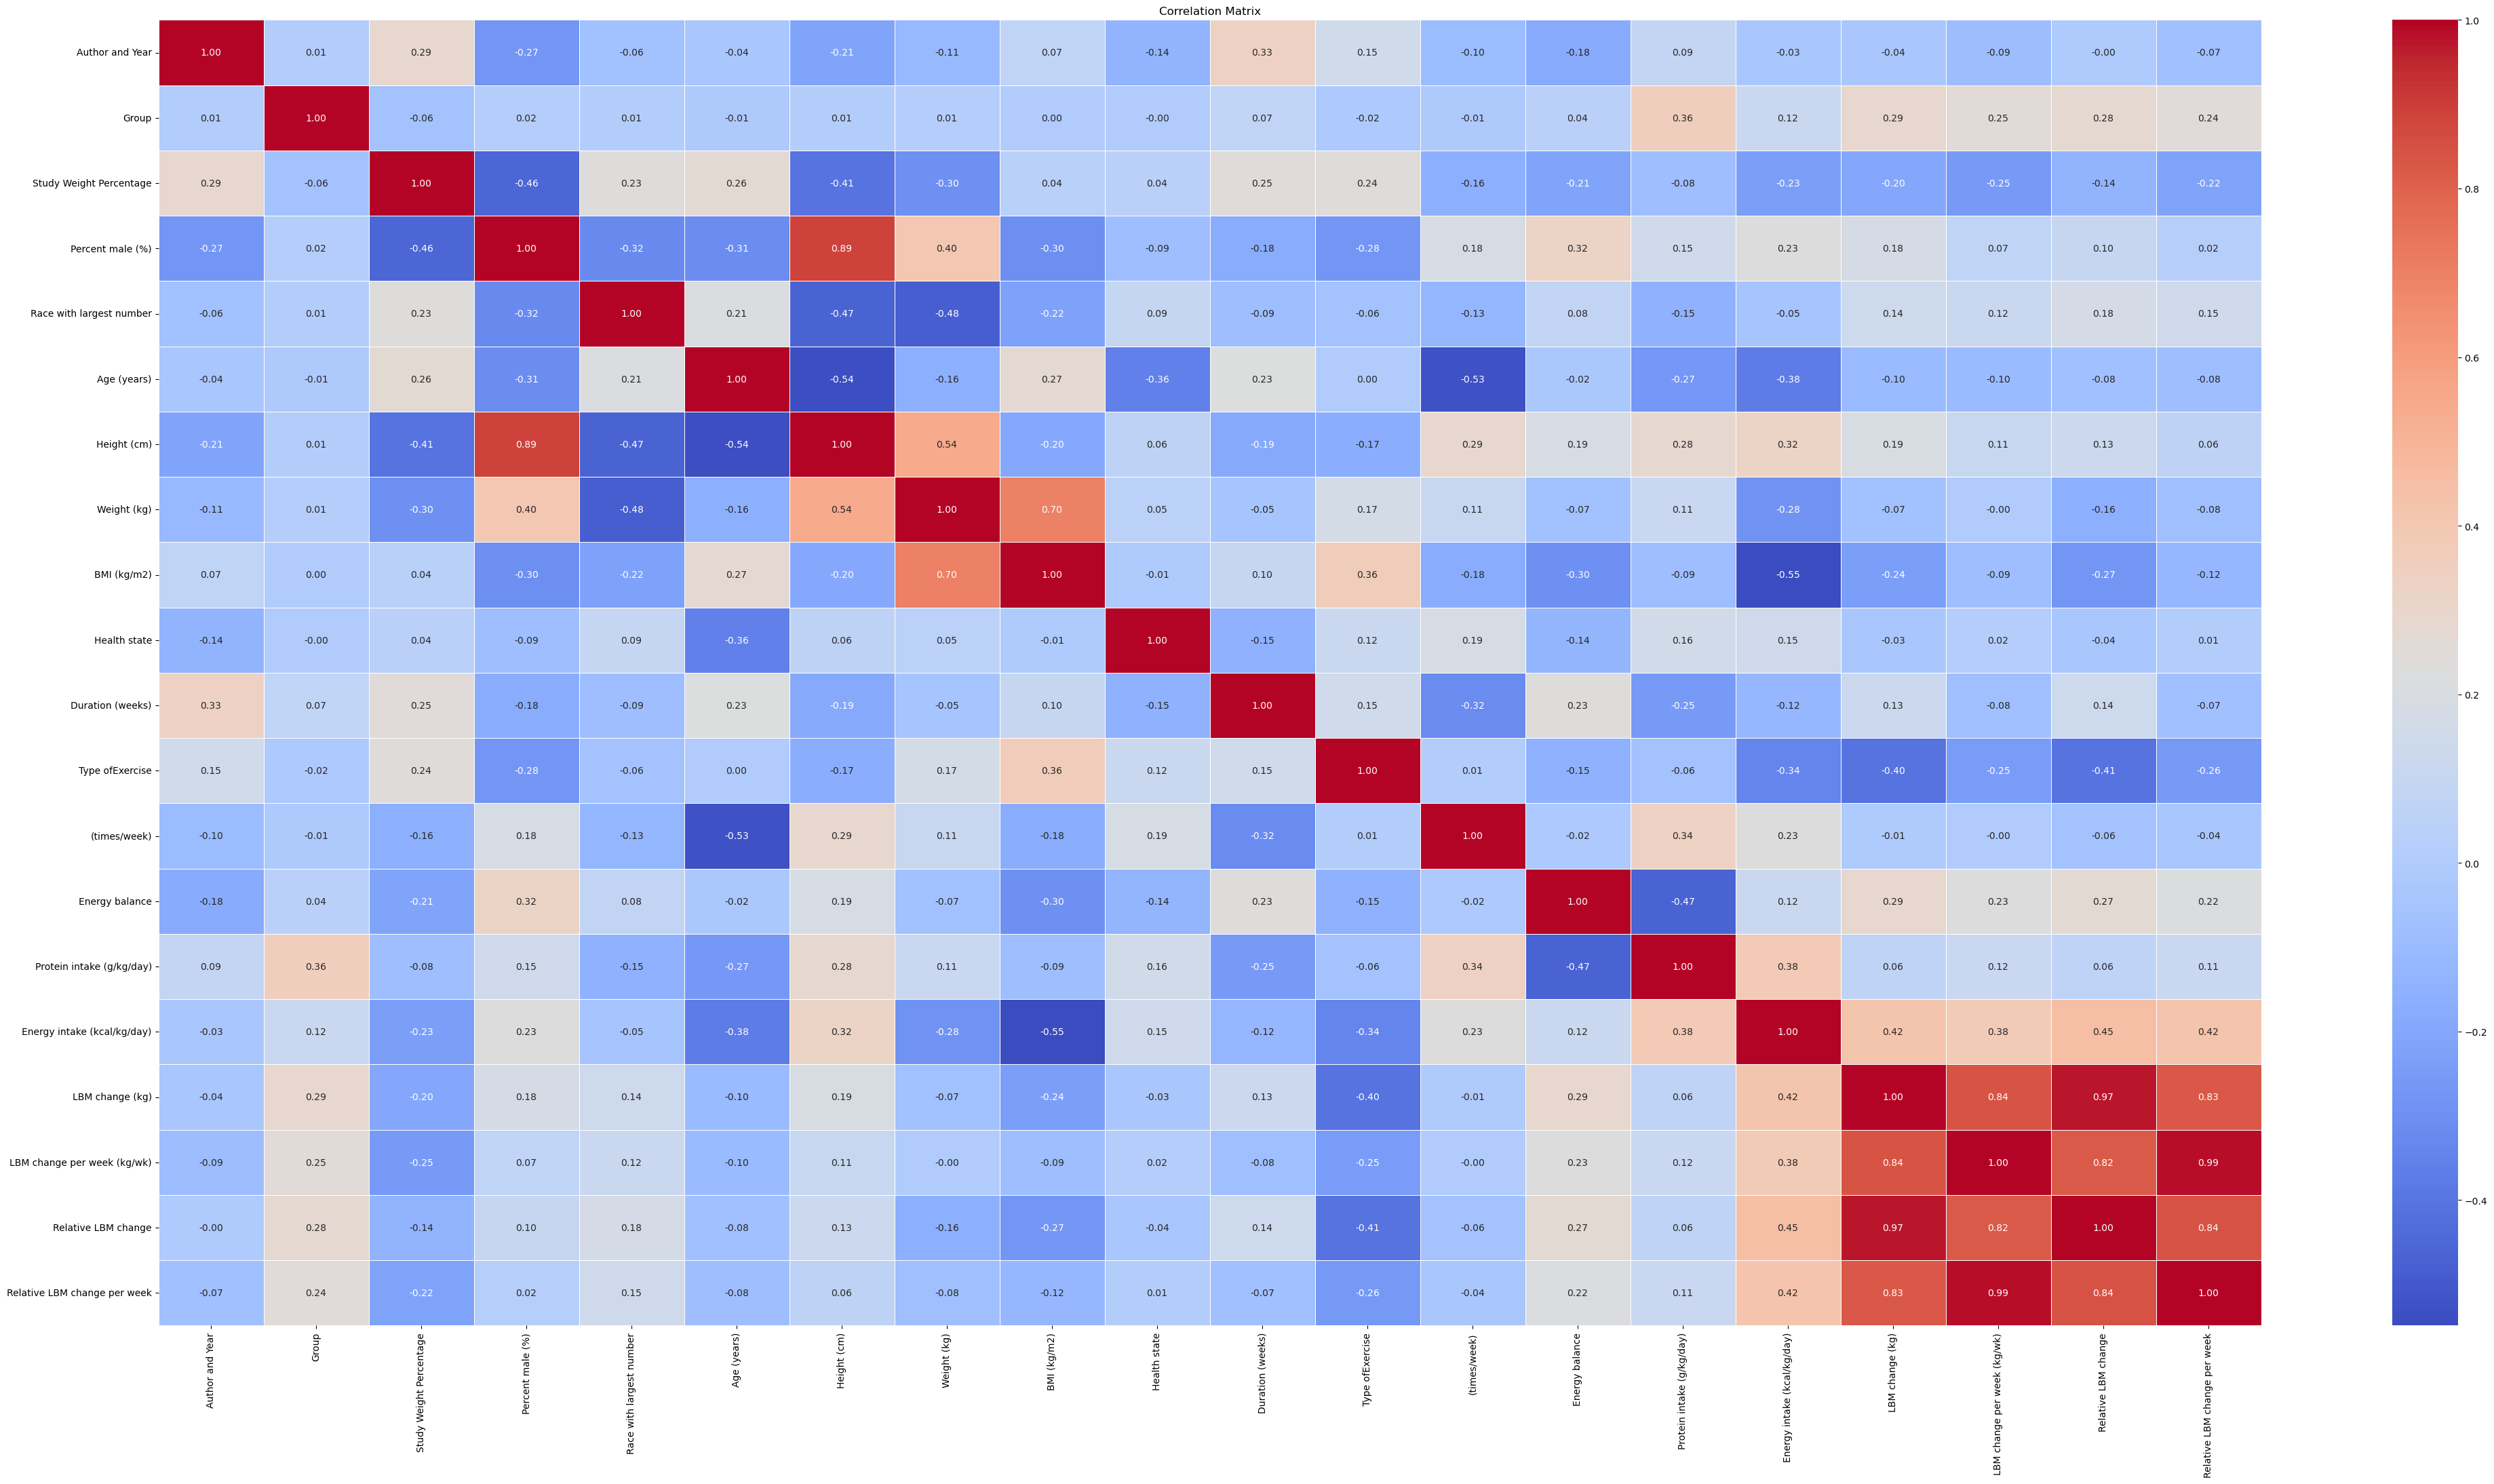

LBM change (kg)                 1.000000
Relative LBM change             0.972757
LBM change per week (kg/wk)     0.842171
Relative LBM change per week    0.826381
Energy intake (kcal/kg/day)     0.415636
Group                           0.291867
Energy balance                  0.289644
Height (cm)                     0.194730
Percent male (%)                0.180789
Race with largest number        0.139467
Duration (weeks)                0.126239
Protein intake (g/kg/day)       0.064485
(times/week)                   -0.007493
Health state                   -0.034119
Author and Year                -0.037221
Weight (kg)                    -0.069607
Age (years)                    -0.101845
Study Weight Percentage        -0.199414
BMI (kg/m2)                    -0.239383
Type ofExercise                -0.404718
Name: LBM change (kg), dtype: float64

In [19]:
import seaborn as sns


# Calculate the correlation matrix
correlation_matrix = ds_filled.corr()

# Show the correlation matrix with respect to "LBM change (kg)"
lbm_corr = correlation_matrix["LBM change (kg)"].sort_values(ascending=False)

# Plot the correlation matrix
plt.figure(figsize=(50, 25))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.7)
plt.title("Correlation Matrix")
plt.show()

# Display the correlation of features with "LBM change (kg)"
lbm_corr

In [21]:
lbm_corr[5:20]
# these are the top variables that relate to the dependent variable 

Group                        0.291867
Energy balance               0.289644
Height (cm)                  0.194730
Percent male (%)             0.180789
Race with largest number     0.139467
Duration (weeks)             0.126239
Protein intake (g/kg/day)    0.064485
(times/week)                -0.007493
Health state                -0.034119
Author and Year             -0.037221
Weight (kg)                 -0.069607
Age (years)                 -0.101845
Study Weight Percentage     -0.199414
BMI (kg/m2)                 -0.239383
Type ofExercise             -0.404718
Name: LBM change (kg), dtype: float64

In [27]:
ds_filled.columns

Index(['Author and Year', 'Group', 'Study Weight Percentage',
       'Percent male (%)', 'Race with largest number', 'Age (years)',
       'Height (cm)', 'Weight (kg)', 'BMI (kg/m2)', 'Health state',
       'Duration (weeks)', 'Type ofExercise', '(times/week)', 'Energy balance',
       'Protein intake (g/kg/day)', 'Energy intake (kcal/kg/day)',
       'LBM change (kg)', 'LBM change per week (kg/wk)', 'Relative LBM change',
       'Relative LBM change per week'],
      dtype='object')

In [29]:
# Check and strip any extra spaces from the column names
ds_filled.columns = ds_filled.columns.str.strip()

# Verify the updated columns (optional)
print(ds_filled.columns)

# Now select columns, ensuring they match the correct names
X = ds_filled.loc[:, [
    "Study Weight Percentage",
    "Percent male (%)", 
    "Race with largest number", 
    "Age (years)", 
    "Height (cm)", 
    "Weight (kg)", 
    "BMI (kg/m2)", 
    "Health state", 
    "Duration (weeks)", 
    "Type ofExercise", 
    "(times/week)", 
    "Energy balance", 
    "Protein intake (g/kg/day)", 
    "Energy intake (kcal/kg/day)", 
    "LBM change (kg)", 
    "LBM change per week (kg/wk)", 
    "Relative LBM change",
    "Relative LBM change per week"
]]

# Target column for prediction
y = ds_filled.loc[:, ["LBM change (kg)"]]

Index(['Author and Year', 'Group', 'Study Weight Percentage',
       'Percent male (%)', 'Race with largest number', 'Age (years)',
       'Height (cm)', 'Weight (kg)', 'BMI (kg/m2)', 'Health state',
       'Duration (weeks)', 'Type ofExercise', '(times/week)', 'Energy balance',
       'Protein intake (g/kg/day)', 'Energy intake (kcal/kg/day)',
       'LBM change (kg)', 'LBM change per week (kg/wk)', 'Relative LBM change',
       'Relative LBM change per week'],
      dtype='object')


In [31]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform X
X_scaled = scaler.fit_transform(X)

X = X_scaled
X

array([[-1.77325481,  0.36979115, -0.36174054, ...,  0.36262309,
         0.58736419,  0.38308703],
       [-0.93526098,  0.80253998, -0.36174054, ...,  1.80221992,
         1.58939472,  1.8741263 ],
       [ 0.74072669,  0.80253998, -0.36174054, ..., -2.93998141,
        -3.39383852, -3.01417727],
       ...,
       [-1.77325481, -0.59752977, -0.36174054, ...,  0.19325876,
        -0.04538845,  0.27048545],
       [-0.09726714,  0.80253998, -0.36174054, ...,  1.25178584,
         0.92964852,  1.22694814],
       [ 1.57872053, -1.74304138,  3.01450452, ..., -0.31483424,
        -0.34971638, -0.22973254]])

In [33]:
y
print(type(y))

<class 'pandas.core.frame.DataFrame'>


In [35]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=0)

In [37]:
from sklearn.svm import SVR
model = SVR()
model.fit(X_train,y_train)

C:\Users\dell\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [39]:
y_pred = model.predict(X_test)

from sklearn.metrics import mean_squared_error, r2_score

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R² Score:", r2)

Mean Squared Error: 1.0836096979678034
R² Score: 0.5532215178648653
